# Bank Customer Churn
Objective: Create a model which can predict bank customers who are going to leave the bank.

# Data Source: 
https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv

# Import Library

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [9]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Bank%20Churn%20Modelling.csv')

# Describe Data

In [10]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [12]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
data.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn'],
      dtype='object')

In [14]:
data.duplicated('CustomerId').sum()

0

In [15]:
data = data.set_index('CustomerId') 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Data preprocessing

In [17]:
# choosing suitable features
data_1 = data[['CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'Num Of Products', 'Has Credit Card',
       'Is Active Member', 'Estimated Salary', 'Churn']]

In [18]:
data_1 = pd.get_dummies(data_1,drop_first = True)

In [19]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   Num Of Products    10000 non-null  int64  
 5   Has Credit Card    10000 non-null  int64  
 6   Is Active Member   10000 non-null  int64  
 7   Estimated Salary   10000 non-null  float64
 8   Churn              10000 non-null  int64  
 9   Geography_Germany  10000 non-null  bool   
 10  Geography_Spain    10000 non-null  bool   
 11  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 810.5 KB


Checking for null values

In [20]:
data_1.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
Num Of Products      0
Has Credit Card      0
Is Active Member     0
Estimated Salary     0
Churn                0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

# Feature engineering
Creating a new feature as zero bank balance, since it will be a useful information.

In [21]:
data_1.loc[(data_1['Balance'] == 0),'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [22]:
data_1['zero_bal'] = np.where((data_1['Balance'] == 0),1,0)

In [23]:
data_1.head()

,CreditScore,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Geography_Germany,Geography_Spain,Gender_Male,zero_bal
CustomerId,,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,1
15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False,0
15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False,0
15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False,1
15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False,0


In [24]:
data_1.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products',
       'Has Credit Card', 'Is Active Member', 'Estimated Salary', 'Churn',
       'Geography_Germany', 'Geography_Spain', 'Gender_Male', 'zero_bal'],
      dtype='object')

# Define Target Variable (y) and Feature Variables (X)

In [25]:
X = data_1.drop(['Churn'],axis = 1)

In [26]:
y = data_1['Churn']

In [27]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

# Handling imbalance data
In classification problems, to get higher accuracy data should be balanced

Two methods to achieve this purpose: Oversampling and undersampling

<Axes: xlabel='Churn', ylabel='count'>

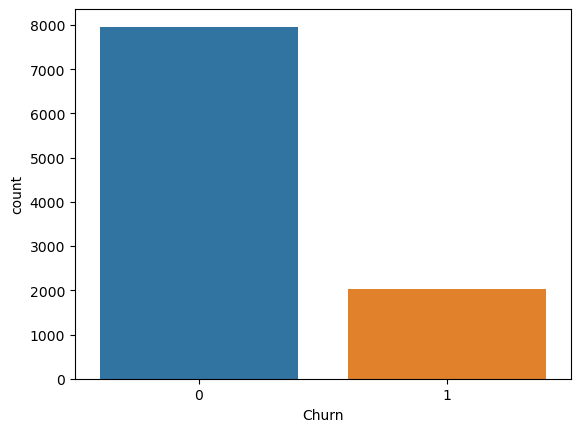

In [28]:
sns.countplot(x='Churn',data = data_1)

# Undersampling

In [30]:
from imblearn.under_sampling import RandomUnderSampler
u_s = RandomUnderSampler(random_state = 0)

In [31]:
X_us,y_us = u_s.fit_resample(X,y)

<Axes: xlabel='Churn', ylabel='count'>

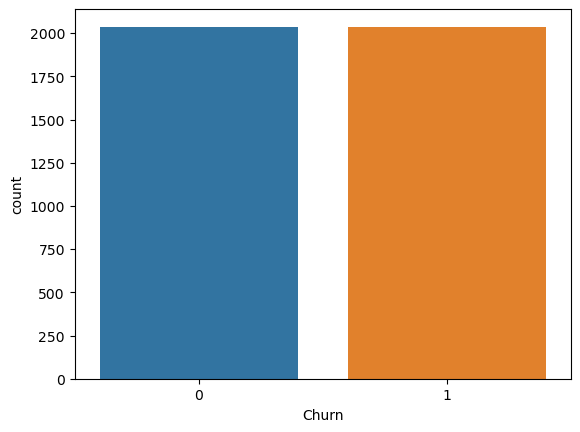

In [32]:
sns.countplot(x= y_us)

# oversampling

In [33]:
from imblearn.over_sampling import RandomOverSampler

In [34]:
o_s = RandomOverSampler(random_state =0)

In [35]:
X_os, y_os = o_s.fit_resample(X,y)

<Axes: xlabel='Churn', ylabel='count'>

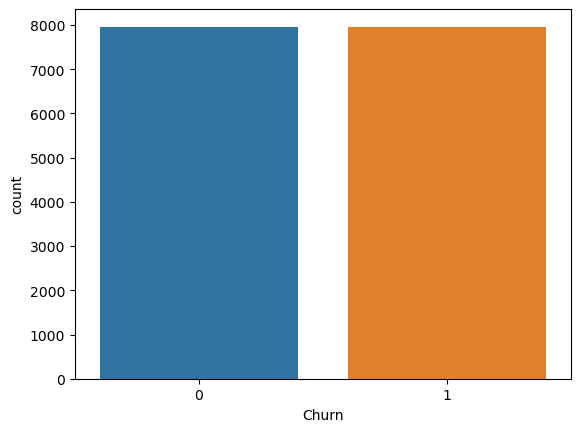

In [36]:
sns.countplot(x= y_os)

# Standardize Feature

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [38]:
X[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']] = ss.fit_transform(X[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']])

In [39]:
X_os[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']] = ss.fit_transform(X_os[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']])
X_us[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']] = ss.fit_transform(X_us[['CreditScore', 'Age', 'Tenure', 'Balance','Estimated Salary']])

# Train_Test_Split

In [40]:
from sklearn.model_selection import train_test_split

X_os_train,X_os_test,y_os_train,y_os_test = train_test_split(X_os,y_os,test_size = 0.25,stratify = y_os,random_state=0)

X_us_train,X_us_test,y_us_train,y_us_test = train_test_split(X_us,y_us,test_size = 0.25,stratify = y_us,random_state=0)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state=0)

# Modeling

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
kn = KNeighborsClassifier()

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier()

In [45]:
# Original data

dtc.fit(X_train,y_train)
y_dtc = dtc.predict(X_test)

In [46]:
# Original data

kn.fit(X_train,y_train)
y_kn = kn.predict(X_test)

In [47]:
# Undersample data

dtc.fit(X_us_train,y_us_train)
y_us_dtc = dtc.predict(X_us_test)

In [48]:
# Undersampled data

kn.fit(X_us_train,y_us_train)
y_us_kn = kn.predict(X_us_test)

In [49]:
# Oversampled data

kn.fit(X_os_train,y_os_train)
y_os_kn = kn.predict(X_os_test)

In [50]:
# Oversampled data

dtc.fit(X_os_train,y_os_train)
y_os_dtc = dtc.predict(X_os_test)

# Model Evaluation
original data

In [51]:
from sklearn.metrics import classification_report

In [52]:
# Original data with Decision tree Model

print(classification_report(y_test,y_dtc))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1991
           1       0.51      0.55      0.53       509

    accuracy                           0.80      2500
   macro avg       0.69      0.71      0.70      2500
weighted avg       0.81      0.80      0.80      2500



In [53]:
# Original data with KNN Model

print(classification_report(y_test,y_kn))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1991
           1       0.67      0.38      0.49       509

    accuracy                           0.84      2500
   macro avg       0.76      0.67      0.69      2500
weighted avg       0.82      0.84      0.82      2500



In [54]:
# Undersampled data with Decision tree Model

print(classification_report(y_us_test,y_us_dtc))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72       510
           1       0.72      0.72      0.72       509

    accuracy                           0.72      1019
   macro avg       0.72      0.72      0.72      1019
weighted avg       0.72      0.72      0.72      1019



In [55]:
# Undersampled data with KNN Model

print(classification_report(y_us_test,y_us_kn))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73       510
           1       0.73      0.74      0.74       509

    accuracy                           0.73      1019
   macro avg       0.73      0.73      0.73      1019
weighted avg       0.73      0.73      0.73      1019



In [56]:
# Oversampled data with Decision tree Model

print(classification_report(y_os_test,y_os_dtc))

              precision    recall  f1-score   support

           0       0.97      0.85      0.90      1991
           1       0.86      0.97      0.92      1991

    accuracy                           0.91      3982
   macro avg       0.92      0.91      0.91      3982
weighted avg       0.92      0.91      0.91      3982



In [57]:
# Oversampled data with KNN Model

print(classification_report(y_os_test,y_os_kn))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      1991
           1       0.77      0.87      0.82      1991

    accuracy                           0.81      3982
   macro avg       0.81      0.81      0.81      3982
weighted avg       0.81      0.81      0.81      3982



# Hyperparameter Tuning For KNeighborClassifier

In [58]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7],  # K values
    'weights': ['uniform', 'distance']  # Weighting options
}

# Create KNN classifier
knn = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_os_train, y_os_train)

# Get best hyperparameters
best_k = grid_search.best_params_['n_neighbors']
best_weight = grid_search.best_params_['weights']


In [59]:
# Evaluating

knn_1 = KNeighborsClassifier(n_neighbors = best_k, weights = best_weight)

In [60]:
knn_1.fit(X_os_train,y_os_train)
y_os_knn_1 = knn_1.predict(X_os_test)

print(classification_report(y_os_test,y_os_knn_1))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86      1991
           1       0.81      0.98      0.88      1991

    accuracy                           0.87      3982
   macro avg       0.89      0.87      0.87      3982
weighted avg       0.89      0.87      0.87      3982



# Results
We can clearly see model's prediction is really bad with imbalanced data, desicion tree recall for churn is 0.52 and KNN recall for churn is just 0.38

Also oversampled data got the best accuracy, since there is no data lost in over sampling.

Decision Tree with oversampled data recall for churn is 0.97

Hyperparameter tunning for KNN classifier increased its accuracy, precision and recall for oversampled data.

# Predictions

In [62]:
def predict_(CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard, IsActiveMember,EstimatedSalary,Country,Gender): 
          
  info = pd.DataFrame([[CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard, IsActiveMember,EstimatedSalary]],columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'Num Of Products','Has Credit Card', 'Is Active Member', 'Estimated Salary'])
  

  match Country.lower():
    case 'france':
        info['Geography_Germany'] = 0
        info['Geography_Spain'] = 0
    case 'germany':
        info['Geography_Germany'] = 1
        info['Geography_Spain'] = 0
    case 'spain':
        info['Geography_Germany'] = 0
        info['Geography_Spain'] = 1    

  match Gender.lower():
     case 'female':
         info['Gender_Male'] = 0
        
     case 'male':
         info['Gender_Male'] = 1
        

  info['zero_bal'] = np.where((info['Balance'] == 0),1,0)

  p_knn = knn_1.predict(info)
  p_dtc = dtc.predict(info)

  if p_knn == 0:
      print("KNN prediction: Not leaving the Bank")
  else:
    print("KNN prediction: Leaving the Bank")

  if p_dtc == 0:
      print("Decision Tree prediction: Not leaving the Bank")
  else:
    print("Decision Tree prediction: Leaving the Bank")

In [63]:
print('To predict customer Churn please enter following details of customer')
CreditScore = float(input('Credit Score: '))
Age = input('Age: ')
Tenure = input('Tenure: ')
Balance = input('Balance: ')
NumOfProducts = input('Num Of Products: ')
HasCreditCard = input('Has Credict Card:True/False? ')
IsActiveMember = input('Is Active Member: True/False? ')
EstimatedSalary = input('Salary: ')
Country = input('Country: ')
Gender = input('Gender: ')

To predict customer Churn please enter following details of customer


Credit Score:  720
Age:  35
Tenure:  2
Balance:  5000
Num Of Products:  2
Has Credict Card:True/False?  0
Is Active Member: True/False?  0
Salary:  20000
Country:  France
Gender:  Male


In [64]:
# Prediction of the manual data

In [65]:
predict_(CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Country,Gender)

KNN prediction: Leaving the Bank
Decision Tree prediction: Leaving the Bank


In [74]:
print('To predict customer Churn please enter following details of customer')
CreditScore = float(input('Credit Score: '))
Age = input('Age: ')
Tenure = input('Tenure: ')
Balance = input('Balance: ')
NumOfProducts = input('Num Of Products: ')
HasCreditCard = input('Has Credict Card:True/False? ')
IsActiveMember = input('Is Active Member: True/False? ')
EstimatedSalary = input('Salary: ')
Country = input('Country: ')
Gender = input('Gender: ')

To predict customer Churn please enter following details of customer


Credit Score:  680
Age:  22
Tenure:  0.5
Balance:  1500
Num Of Products:  1
Has Credict Card:True/False?  0
Is Active Member: True/False?  1
Salary:  20000
Country:  France
Gender:  Male


In [75]:
predict_(CreditScore,Age,Tenure,Balance,NumOfProducts,HasCreditCard,IsActiveMember,EstimatedSalary,Country,Gender)

KNN prediction: Not leaving the Bank
Decision Tree prediction: Not leaving the Bank


# You can check it on your data.